In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-217-1 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,72725.5,45.383200,4193.36,2.616800,NaN
2,285,11.750000,37833.1,43.978660,3459.40,4.021340,NaN
3,535,15.916667,36613.4,42.772820,4474.45,5.227180,NaN
4,786,20.100000,35410.5,41.596782,5450.93,6.403218,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,72725.5,45.383200,4193.36,2.616800,NaN
2,285,11.750000,37833.1,43.978660,3459.40,4.021340,NaN
3,535,15.916667,36613.4,42.772820,4474.45,5.227180,NaN
4,786,20.100000,35410.5,41.596782,5450.93,6.403218,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.727168e-03 6.462461e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7fda1c40ed90>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fda1c40ee80>

Goodness of fit qualifiers:
chi_squared            1.179251184629992
objective_value        0.589625592314996
r_squared              0.9956720112792093


<IPython.core.display.Javascript object>


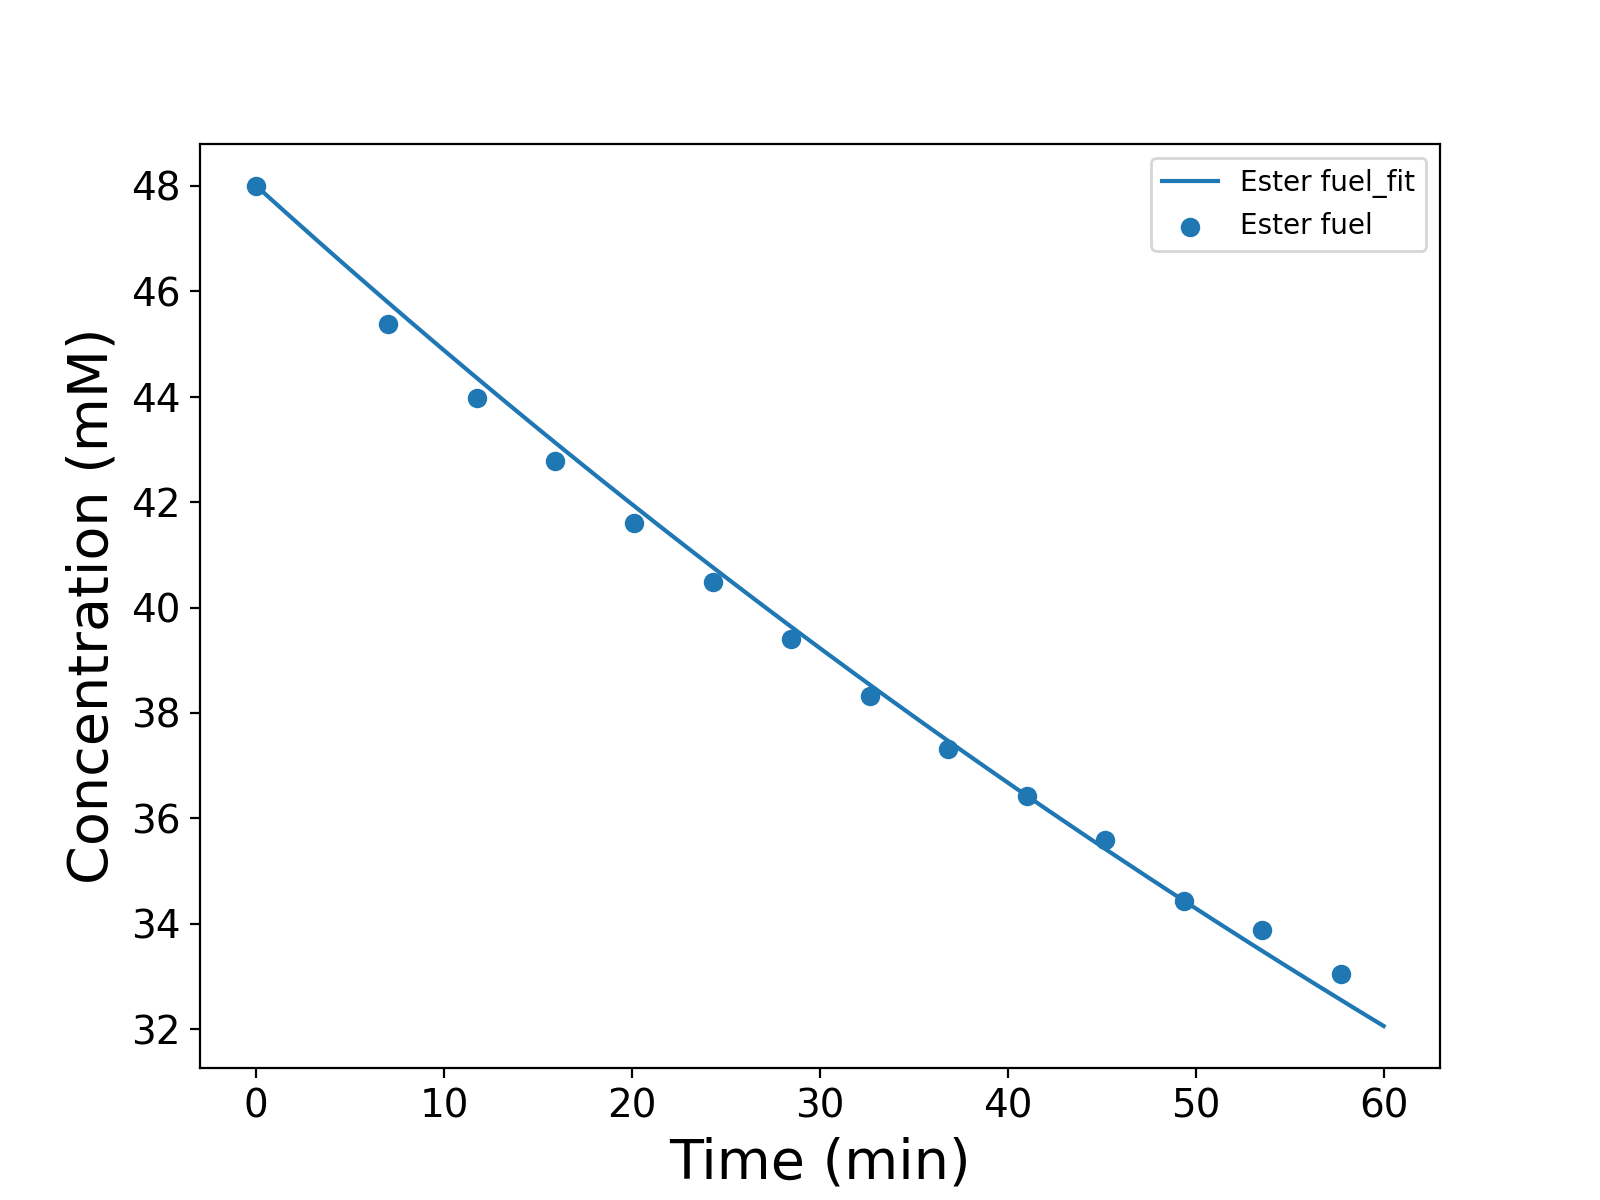

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-217-1 60 min (10 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-217-2 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,72138.9,46.006964,3125.08,1.993036,NaN
2,284,11.733333,37882.1,45.088244,2446.39,2.911756,NaN
3,535,15.916667,37015.5,44.206871,3176.08,3.793129,NaN
4,786,20.100000,36137.4,43.335693,3889.54,4.664307,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,72138.9,46.006964,3125.08,1.993036,NaN
2,284,11.733333,37882.1,45.088244,2446.39,2.911756,NaN
3,535,15.916667,37015.5,44.206871,3176.08,3.793129,NaN
4,786,20.100000,36137.4,43.335693,3889.54,4.664307,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.833628e-03 4.203202e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fda1cd6e400>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fda1cd6e520>

Goodness of fit qualifiers:
chi_squared            0.5875604987980054
objective_value        0.2937802493990027
r_squared              0.9962541895973651


<IPython.core.display.Javascript object>


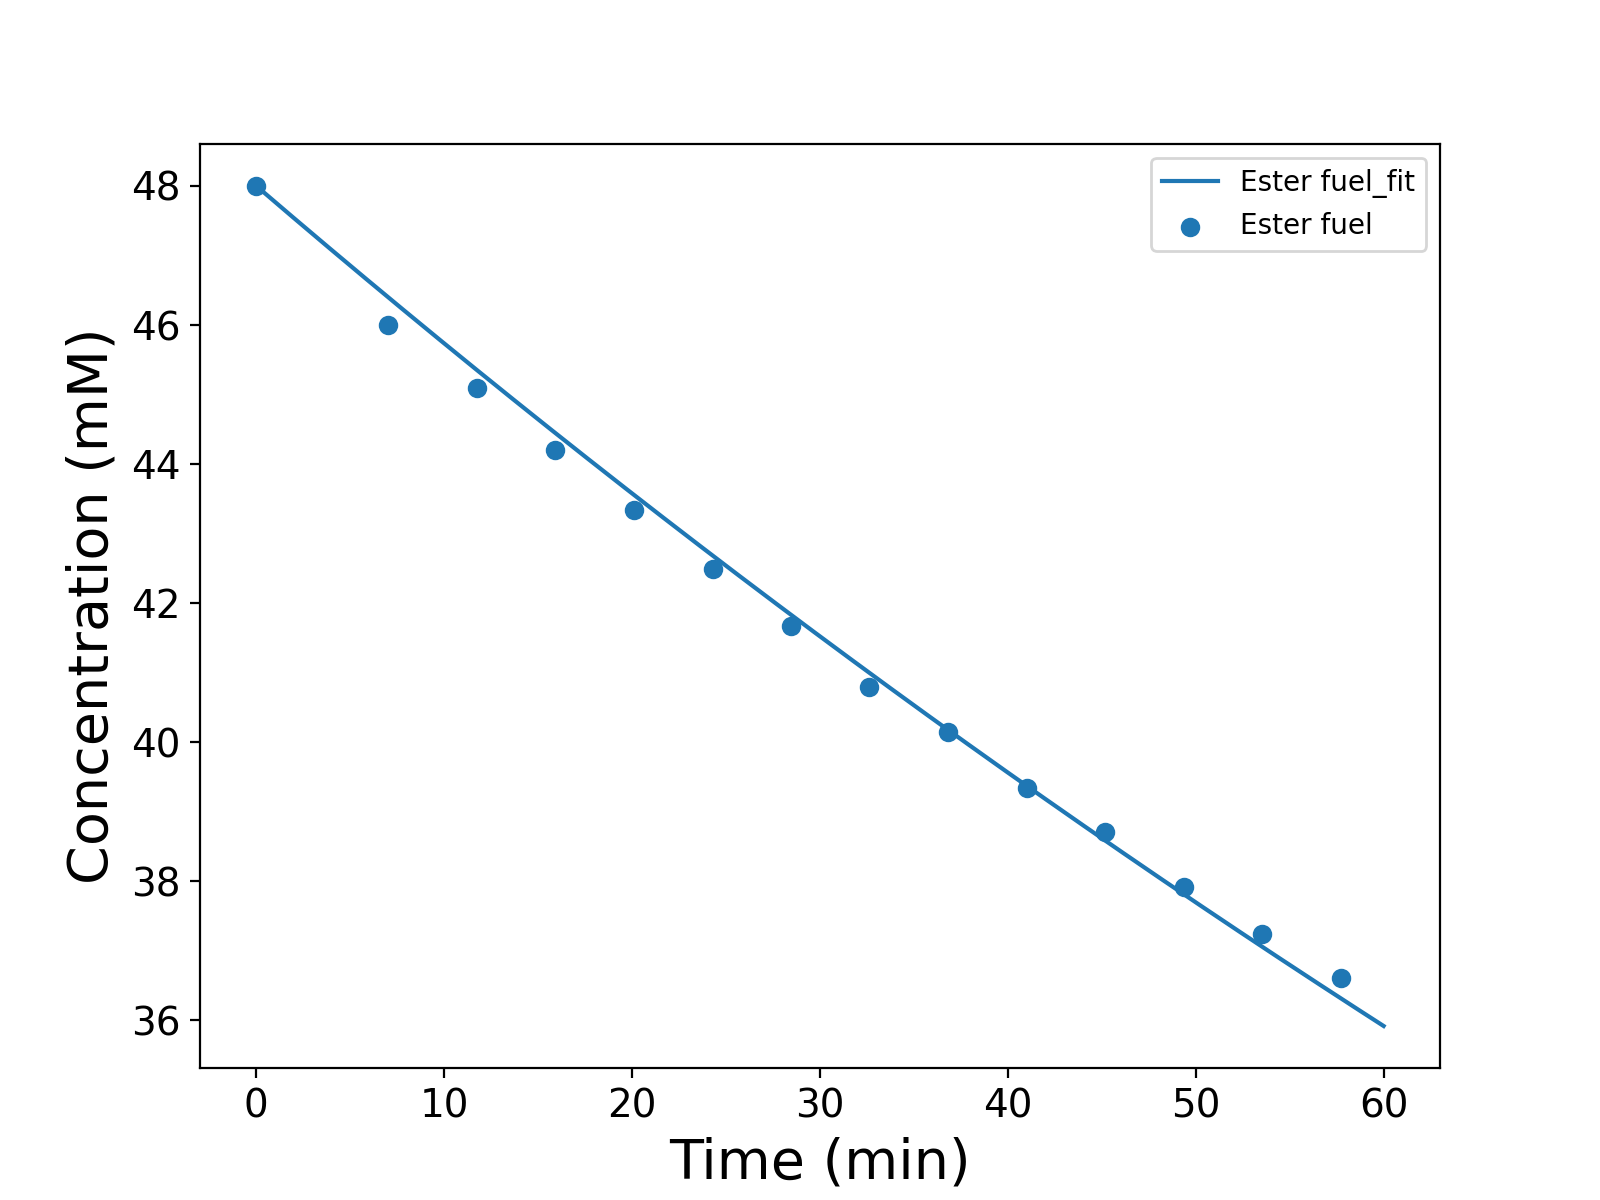

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-217-2 60 min (6 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-217-3 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,76129.9,46.792173,1965.11,1.207827,NaN
2,287,11.783333,41143.5,46.383110,1434.24,1.616890,NaN
3,537,15.950000,40683.3,45.874970,1884.54,2.125030,NaN
4,788,20.133333,40142.7,45.426053,2274.58,2.573947,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,76129.9,46.792173,1965.11,1.207827,NaN
2,287,11.783333,41143.5,46.383110,1434.24,1.616890,NaN
3,537,15.950000,40683.3,45.874970,1884.54,2.125030,NaN
4,788,20.133333,40142.7,45.426053,2274.58,2.573947,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.549638e-03 2.913013e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fda1c6345e0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fda1c634fd0>

Goodness of fit qualifiers:
chi_squared            0.34542676562228114
objective_value        0.17271338281114057
r_squared              0.9928317423594654


<IPython.core.display.Javascript object>


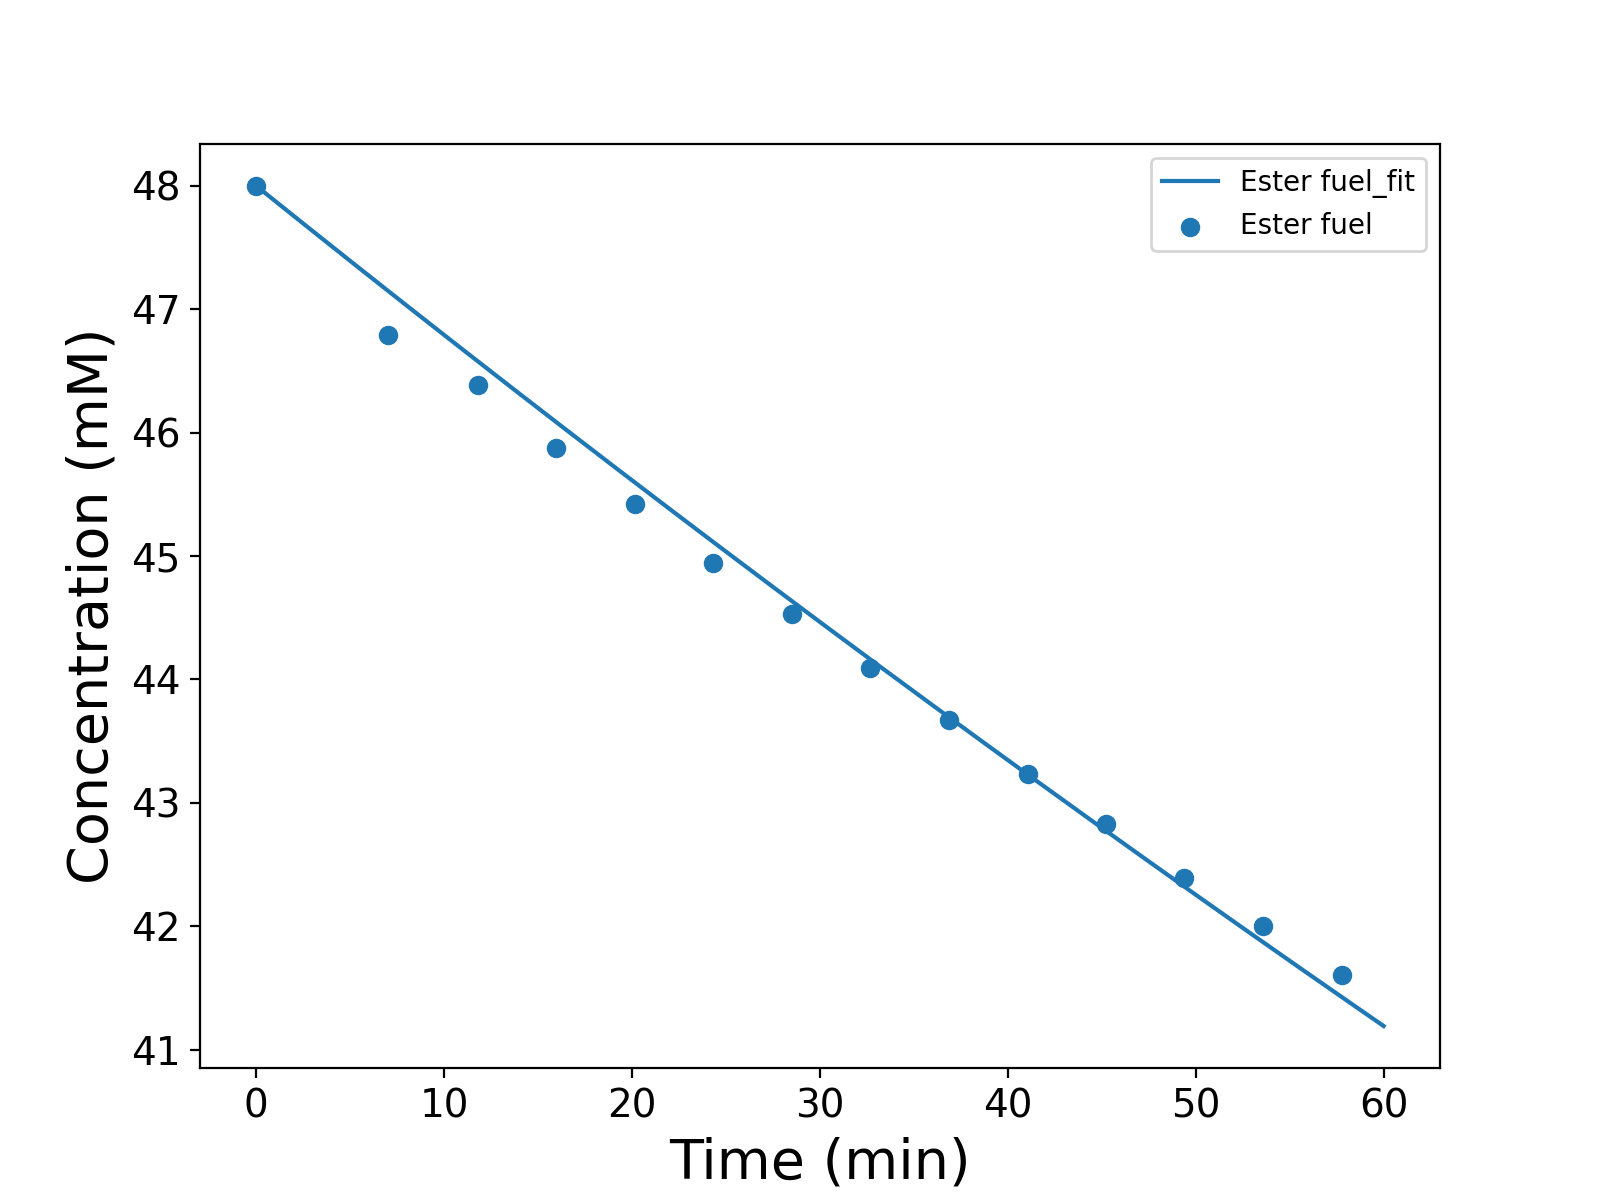

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-217-3 60 min (2 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-218-1 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74076.1,47.096099,1421.720,0.903901,NaN
2,297,11.950000,39878.9,46.858066,971.851,1.141934,NaN
3,547,16.116667,39650.3,46.651116,1146.460,1.348884,NaN
4,797,20.283333,39439.7,46.452601,1313.790,1.547399,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74076.1,47.096099,1421.720,0.903901,NaN
2,297,11.950000,39878.9,46.858066,971.851,1.141934,NaN
3,547,16.116667,39650.3,46.651116,1146.460,1.348884,NaN
4,797,20.283333,39439.7,46.452601,1313.790,1.547399,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.401370e-03 3.480428e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fe1d33dfe20>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fe1d33dff40>

Goodness of fit qualifiers:
chi_squared            0.5502003042129966
objective_value        0.2751001521064983
r_squared              0.9592102259900572


<IPython.core.display.Javascript object>


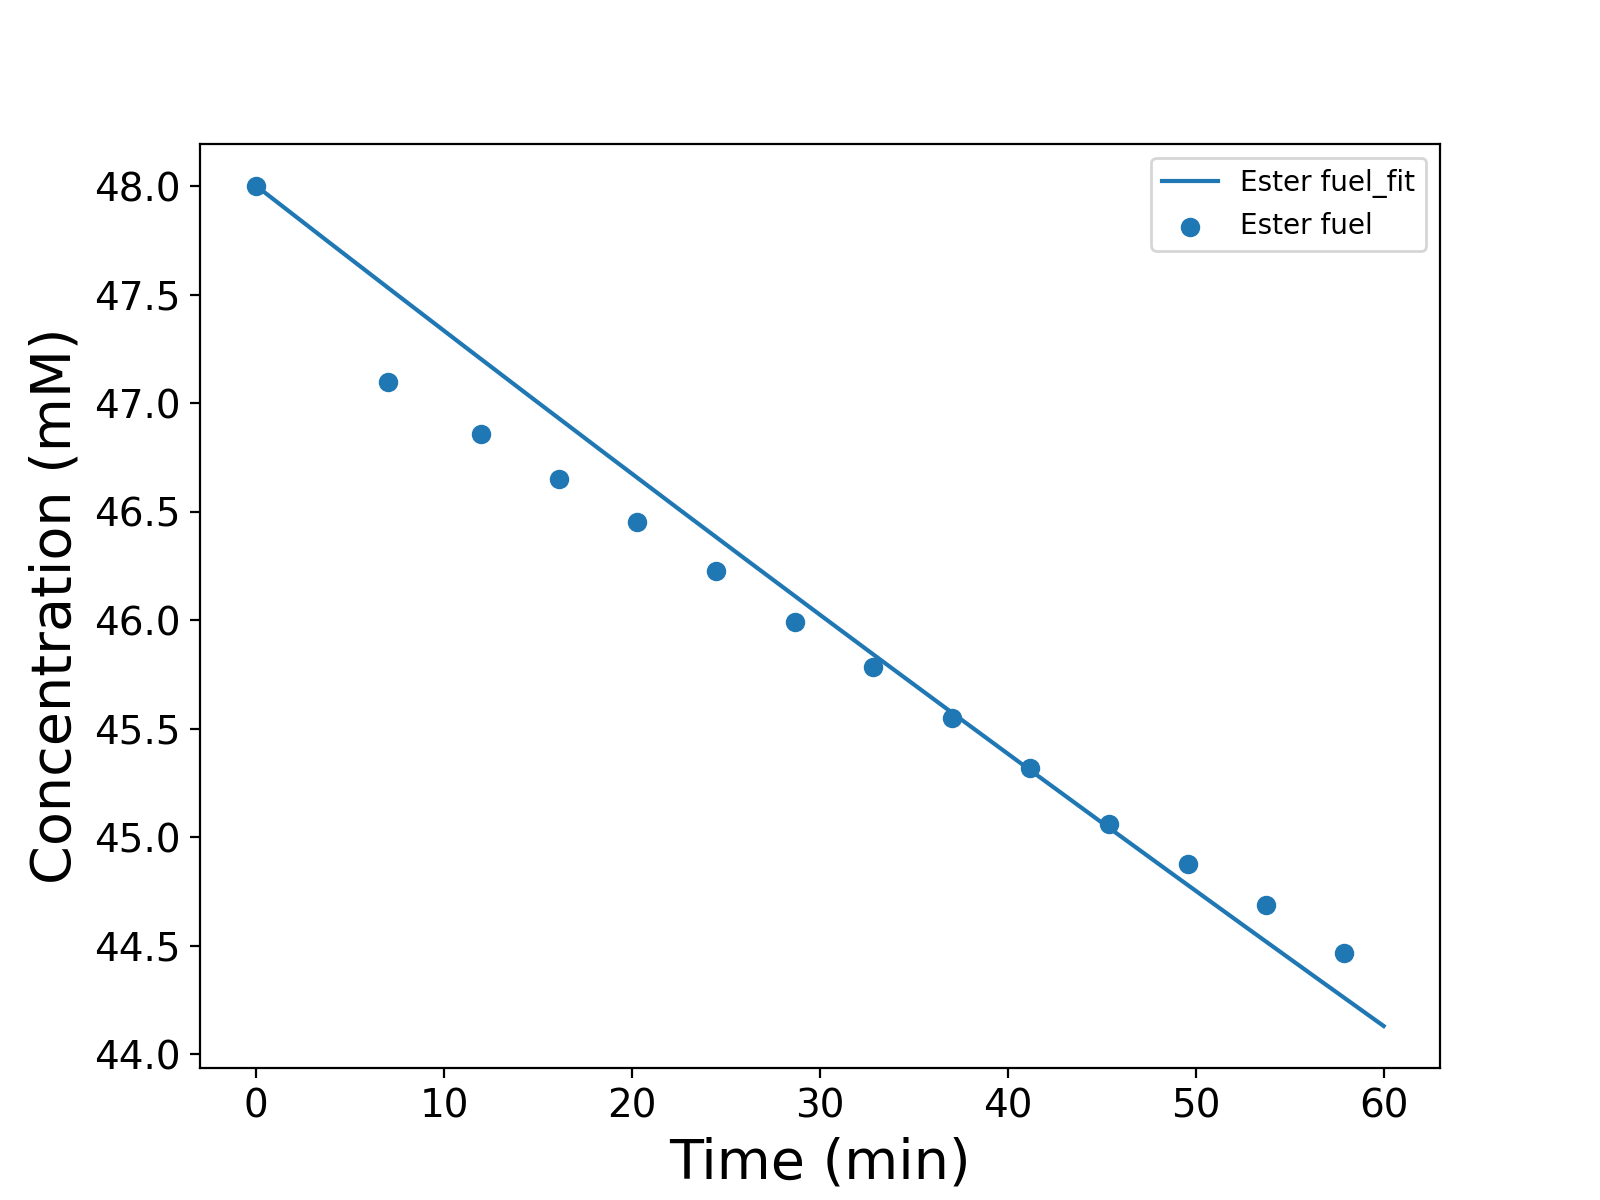

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-218-1 60 min (0.6 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-218-2 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,78856.9,47.186865,1358.880,0.813135,NaN
2,298,11.966667,42441.2,47.059061,848.606,0.940939,NaN
3,548,16.133333,42259.1,46.879267,1010.280,1.120733,NaN
4,799,20.316667,42068.1,46.707519,1164.100,1.292481,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,78856.9,47.186865,1358.880,0.813135,NaN
2,298,11.966667,42441.2,47.059061,848.606,0.940939,NaN
3,548,16.133333,42259.1,46.879267,1010.280,1.120733,NaN
4,799,20.316667,42068.1,46.707519,1164.100,1.292481,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.123119e-03 3.291182e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fe1d3cf2220>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fe1d3cf2280>

Goodness of fit qualifiers:
chi_squared            0.5042961512745716
objective_value        0.2521480756372858
r_squared              0.9398051203976284


<IPython.core.display.Javascript object>


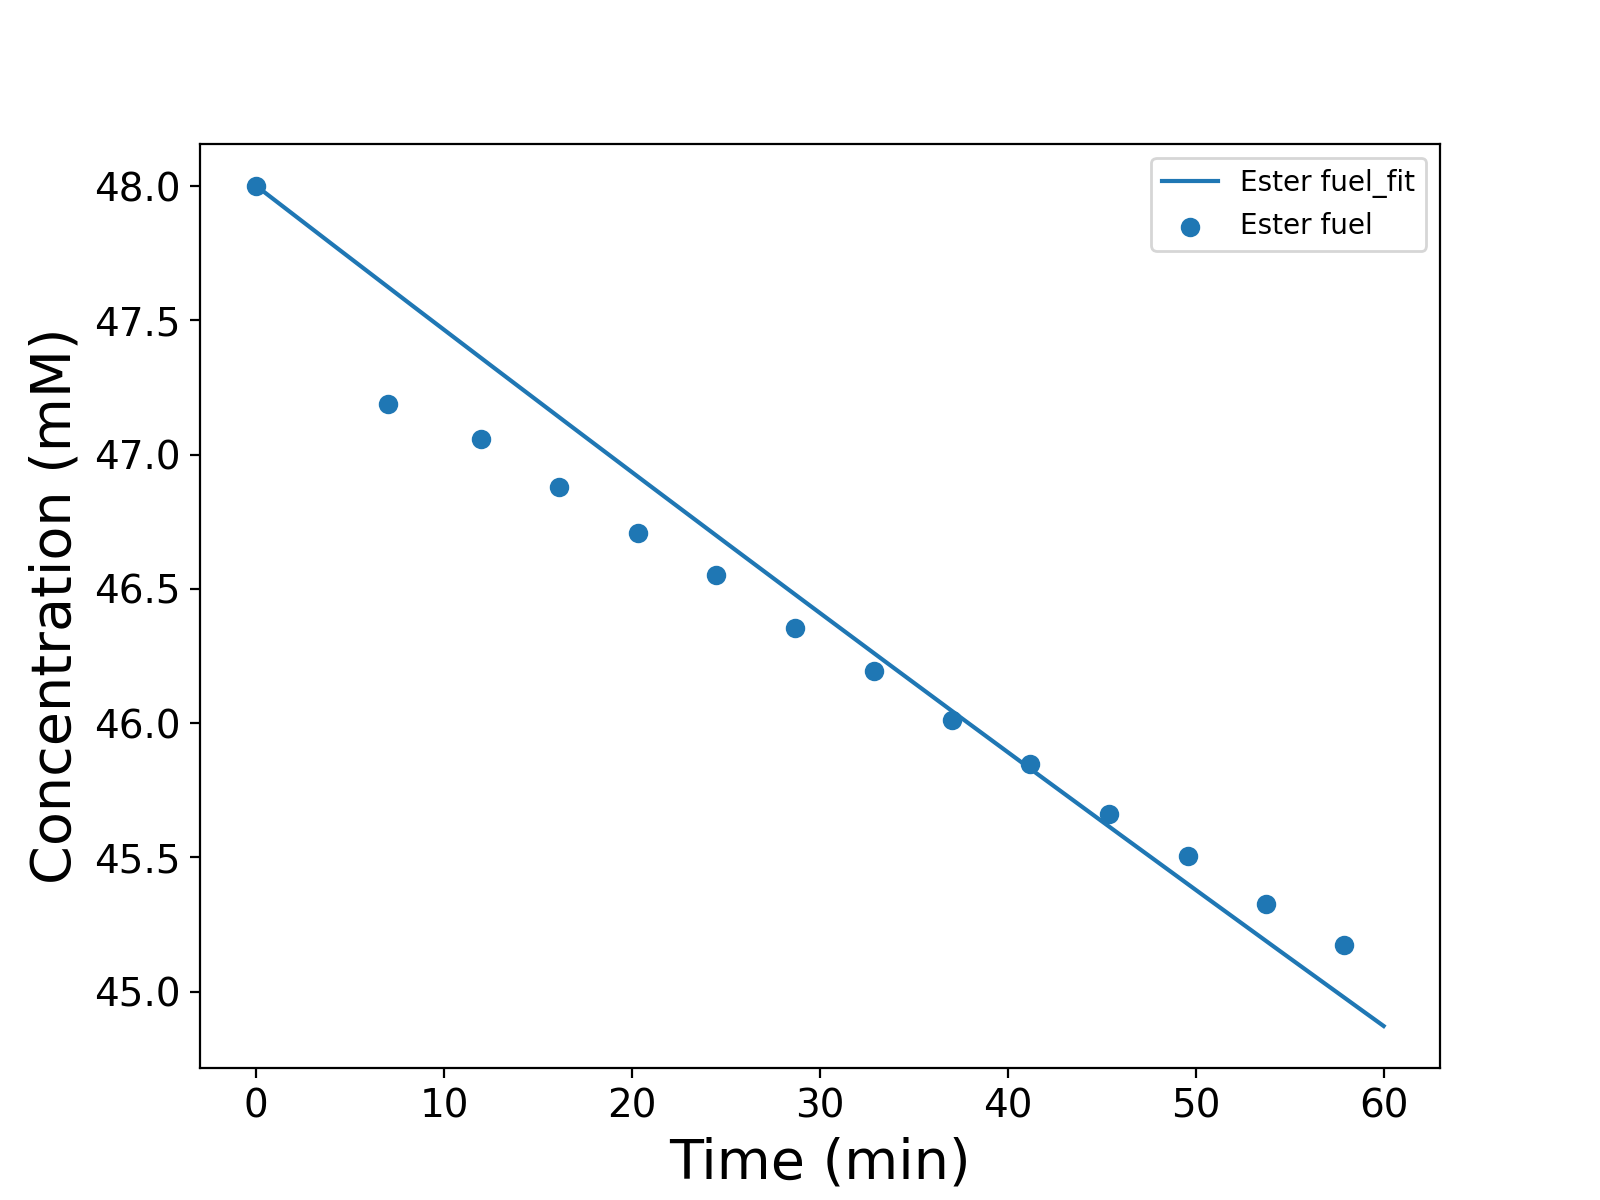

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-218-2 60 min (0.2 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-218-3 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,82350.5,47.186405,1419.900,0.813595,NaN
2,295,11.916667,40861.6,47.076961,801.174,0.923039,NaN
3,546,16.100000,40636.9,46.958269,901.497,1.041731,NaN
4,797,20.283333,40399.8,46.762309,1069.290,1.237691,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,82350.5,47.186405,1419.900,0.813595,NaN
2,295,11.916667,40861.6,47.076961,801.174,0.923039,NaN
3,546,16.100000,40636.9,46.958269,901.497,1.041731,NaN
4,797,20.283333,40399.8,46.762309,1069.290,1.237691,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.088799e-03 3.203767e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   9
Objective              <symfit.core.objectives.LeastSquares object at 0x7fe18002e730>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fe1d3cf20a0>

Goodness of fit qualifiers:
chi_squared            0.47837129640992965
objective_value        0.23918564820496482
r_squared              0.9394834952122029


<IPython.core.display.Javascript object>


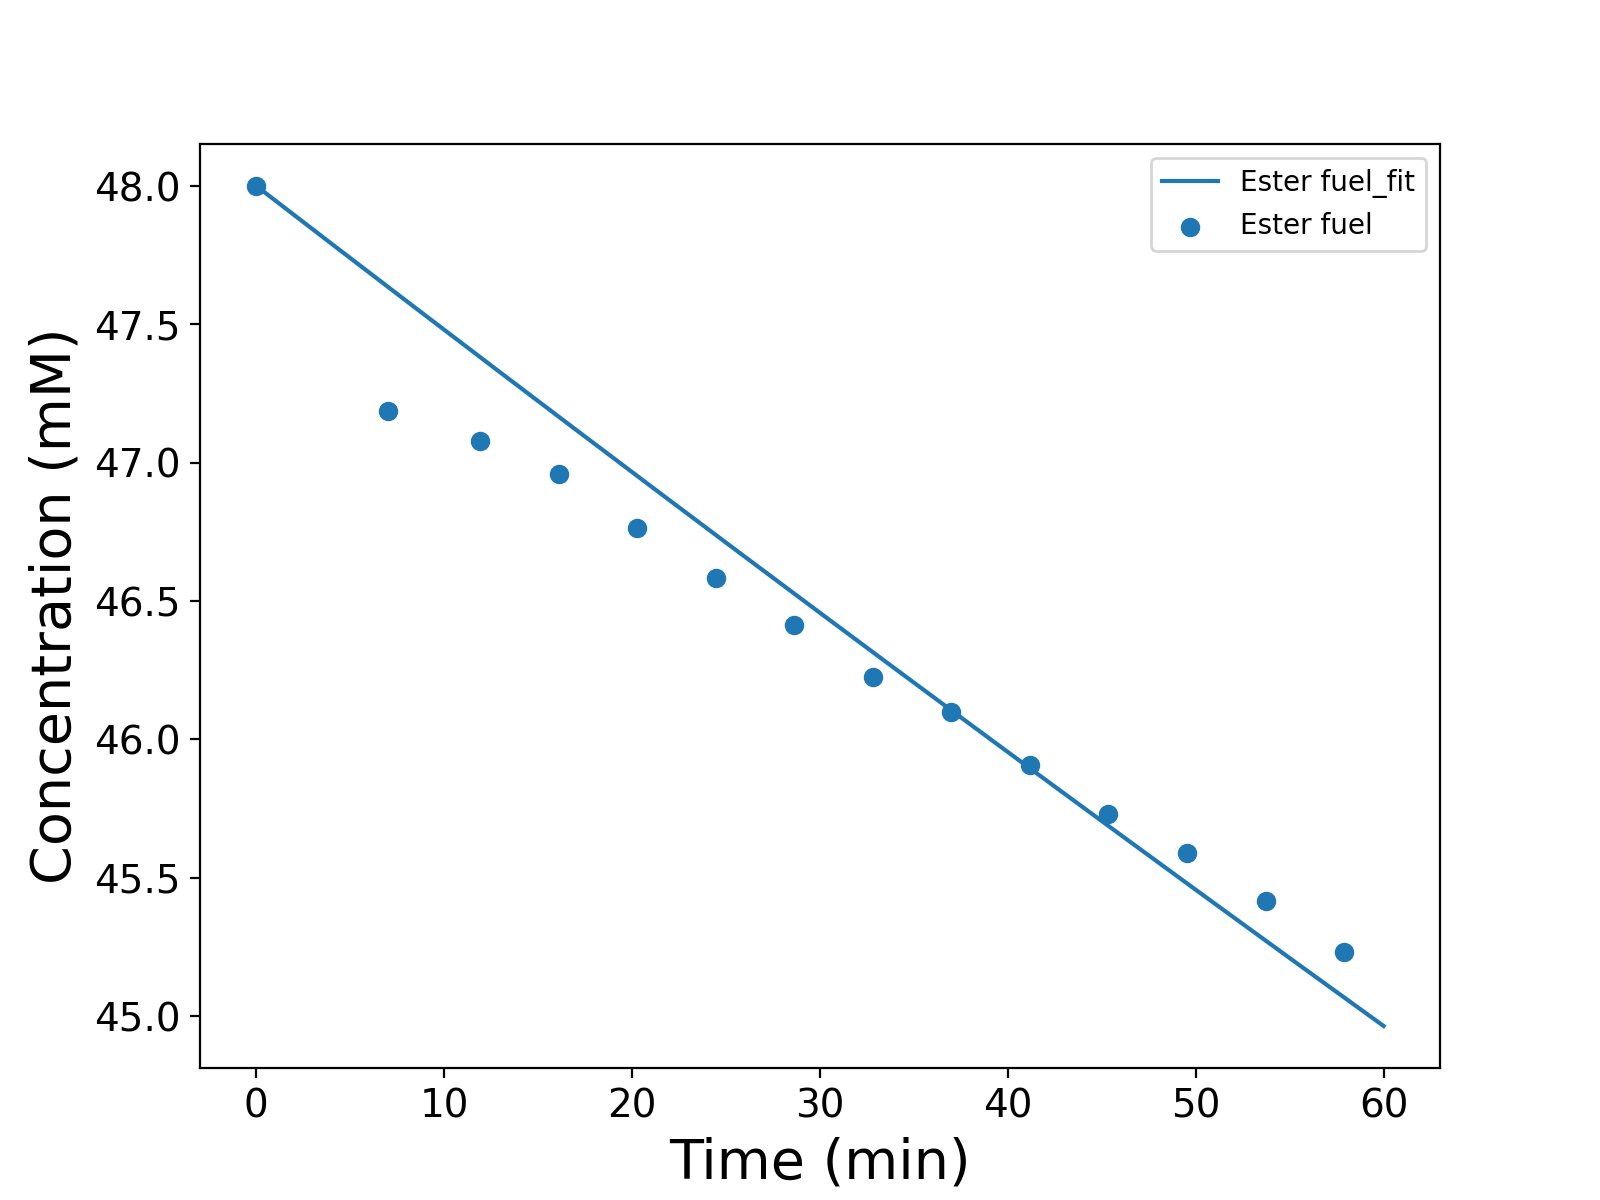

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-218-3 60 min (0.06 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [14]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-218-5 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,86595.9,47.407947,1081.450,0.592053,NaN
2,311,12.183333,43450.8,47.284354,657.625,0.715646,NaN
3,562,16.366667,43284.0,47.157477,773.319,0.842523,NaN
4,812,20.533333,43144.2,47.024528,894.979,0.975472,NaN


In [15]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,86595.9,47.407947,1081.450,0.592053,NaN
2,311,12.183333,43450.8,47.284354,657.625,0.715646,NaN
3,562,16.366667,43284.0,47.157477,773.319,0.842523,NaN
4,812,20.533333,43144.2,47.024528,894.979,0.975472,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        8.032964e-04 2.698999e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fe1d36183a0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fe1d3618340>

Goodness of fit qualifiers:
chi_squared            0.34495912386530736
objective_value        0.17247956193265368
r_squared              0.9178275209051386


<IPython.core.display.Javascript object>


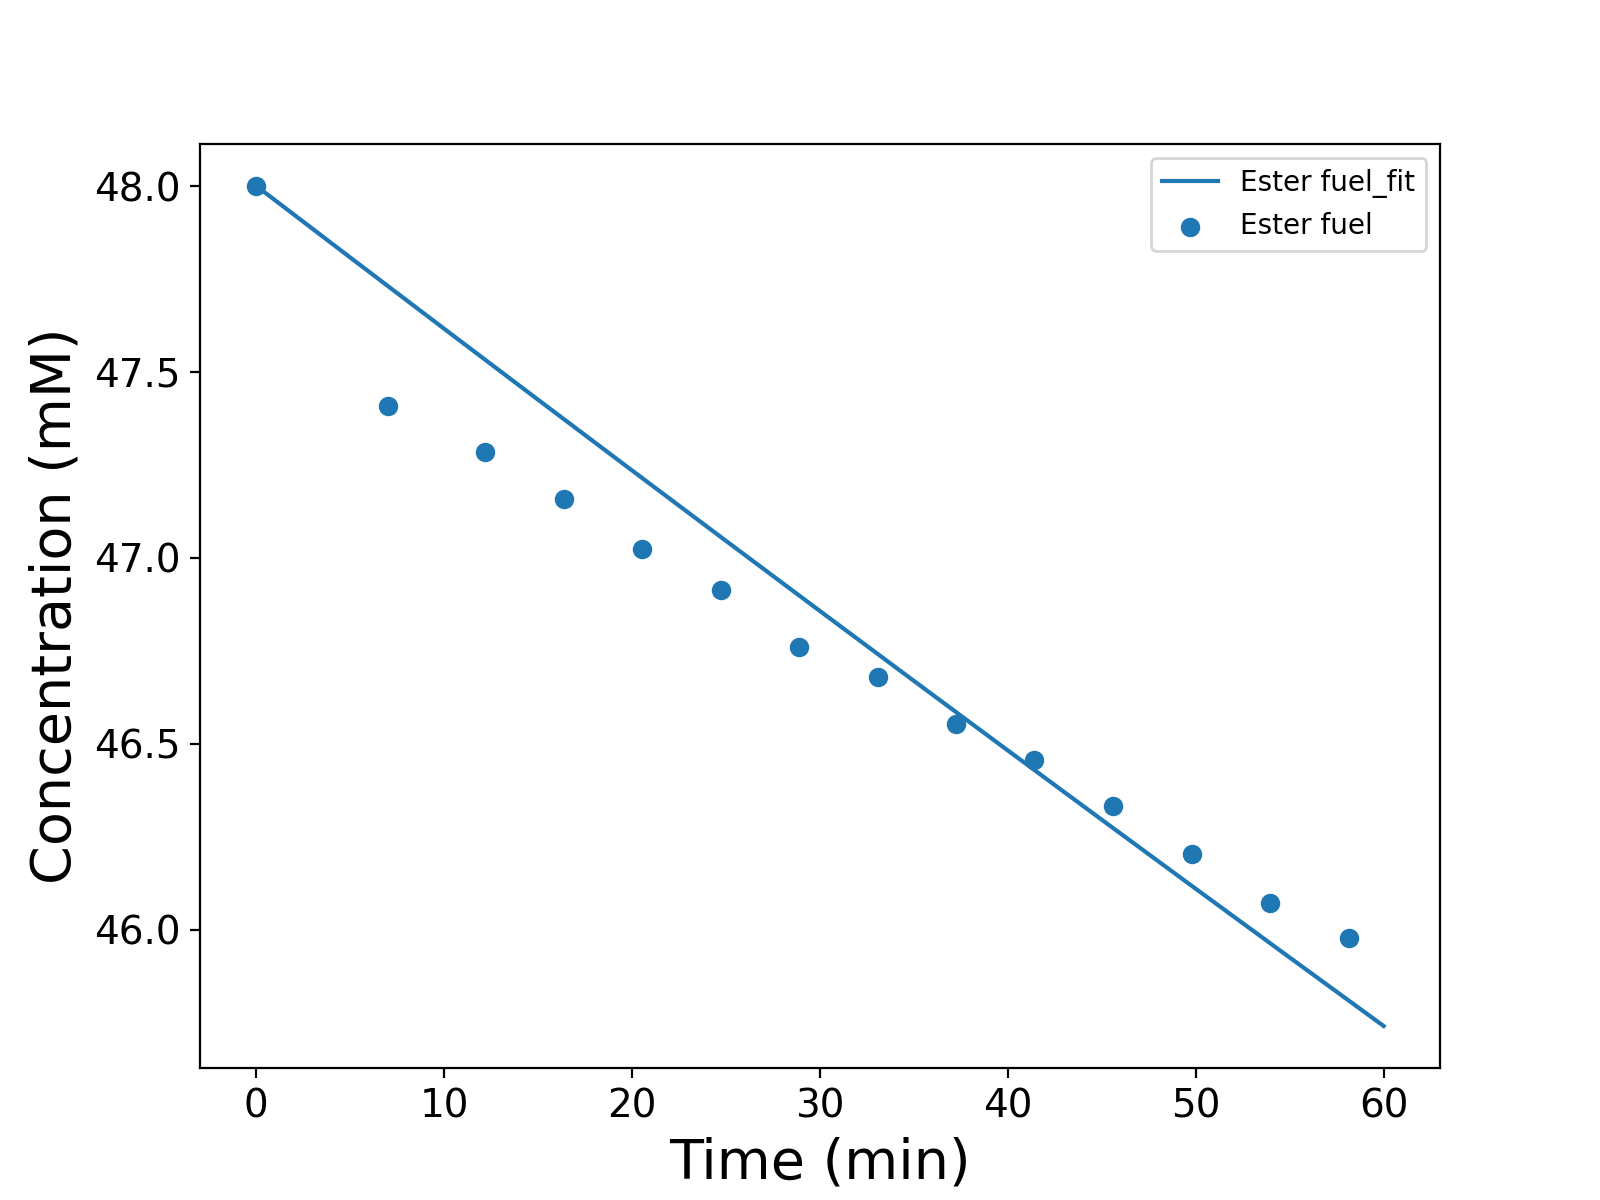

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-218-5 60 min (0 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()